In [0]:
import keras 
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from keras.regularizers import l2
from keras.optimizers import SGD, RMSprop
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.layers import Input, GlobalAveragePooling2D
from keras import models
from keras.models import Model
import cv2 
import numpy as np 
from keras.datasets import cifar10 
from keras import backend as K 

In [0]:
from keras.datasets import mnist
from keras.utils import np_utils

img_rows, img_cols, num_classes = 28, 28, 10

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
print(input_shape)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(28, 28, 1)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
input_img = Input(shape=input_shape)

### 1st layer
layer_1 = Conv2D(10, (1,1), padding='same', activation='relu')(input_img)
layer_1 = Conv2D(10, (3,3), padding='same', activation='relu')(layer_1)

layer_2 = Conv2D(10, (1,1), padding='same', activation='relu')(input_img)
layer_2 = Conv2D(10, (5,5), padding='same', activation='relu')(layer_2)

layer_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
layer_3 = Conv2D(10, (1,1), padding='same', activation='relu')(layer_3)

mid_1 = keras.layers.concatenate([layer_1, layer_2, layer_3], axis = 3)

In [0]:
flat_1 = Flatten()(mid_1)
num_classes = 10

dense_1 = Dense(1200, activation='relu')(flat_1)
dense_2 = Dense(600, activation='relu')(dense_1)
dense_3 = Dense(150, activation='relu')(dense_2)
output = Dense(num_classes, activation='softmax')(dense_3)

In [0]:
model = Model([input_img], output)

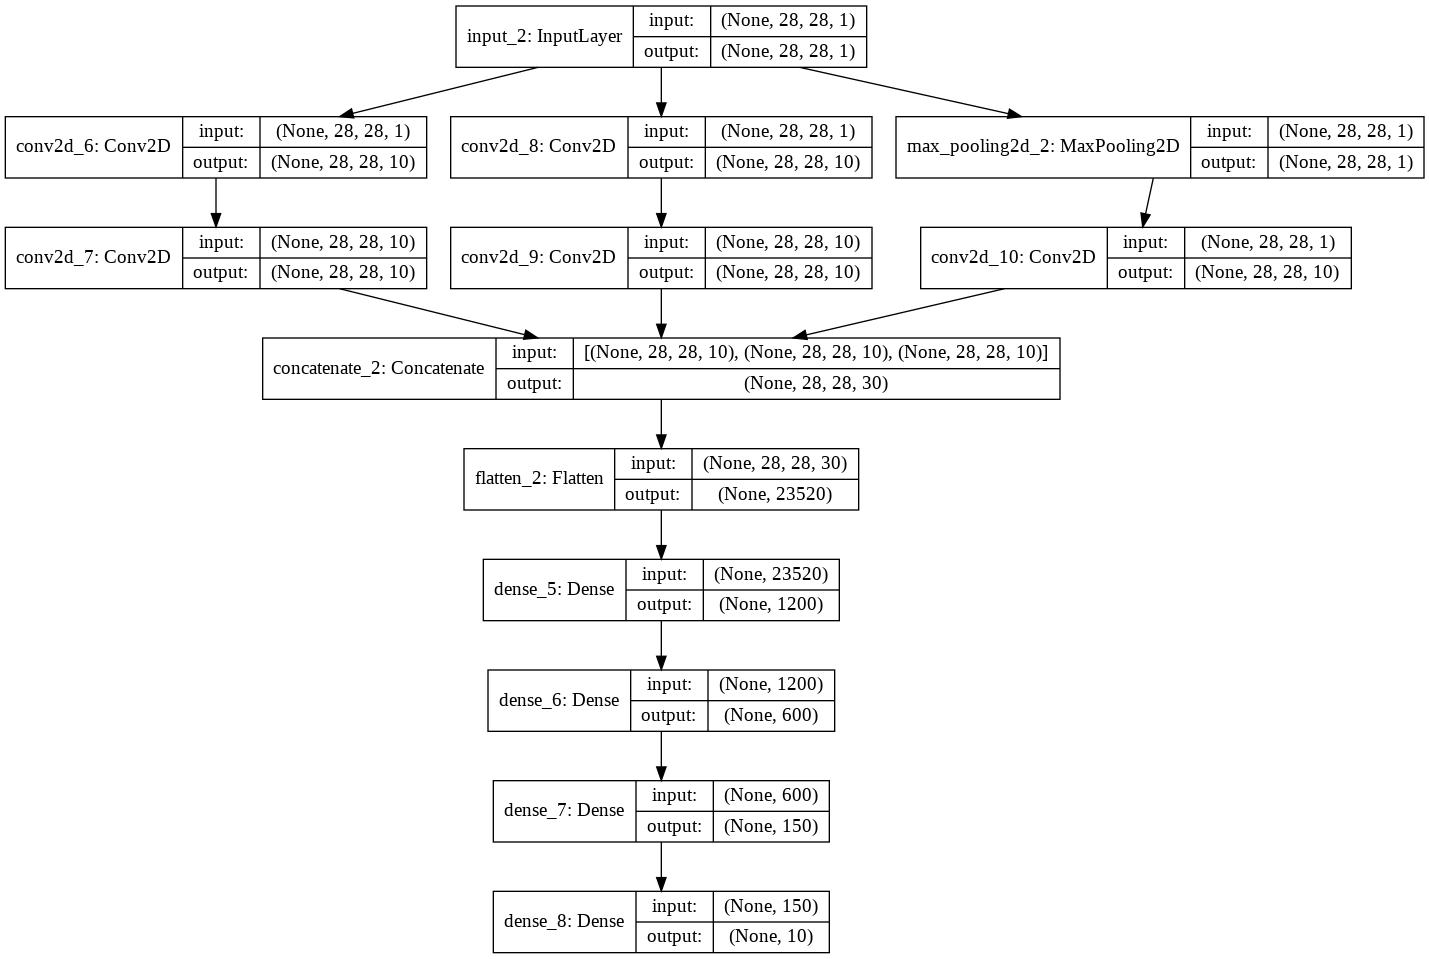

In [0]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [0]:
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [0]:
history = model.fit(x_train, y_train, epochs=40, batch_size=32, validation_data=(x_test, y_test))
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))
history = model.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 67s 1ms/step - loss: 0.2049 - accuracy: 0.9458 - val_loss: 0.0911 - val_accuracy: 0.9756
Epoch 2/40
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0918 - accuracy: 0.9772 - val_loss: 0.0908 - val_accuracy: 0.9752
Epoch 3/40
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0811 - accuracy: 0.9805 - val_loss: 0.0816 - val_accuracy: 0.9785
Epoch 4/40
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0752 - accuracy: 0.9825 - val_loss: 0.1397 - val_accuracy: 0.9612
Epoch 5/40
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0739 - accuracy: 0.9834 - val_loss: 0.1165 - val_accuracy: 0.9720
Epoch 6/40
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0722 - accuracy: 0.9847 - val_loss: 0.1183 - val_accuracy: 0.9788
Epoch 7/40
60000/60000 [==============================] - 67s 1ms/st

In [0]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 98.03%
